In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt


In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
x_train,x_test=x_train/255.0,x_test/255.0

In [ ]:
class_name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
model=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(1000,activation='relu'),
    layers.Dense(500,activation='relu'),
    layers.Dense(200,activation='relu'),
    layers.Dense(50,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,epochs=10,batch_size=200,validation_data=(x_test,y_test))

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 115ms/step - accuracy: 0.0993 - loss: 2.3728 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 113ms/step - accuracy: 0.0997 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 113ms/step - accuracy: 0.1015 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 46s 132ms/step - accuracy: 0.0989 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 38s 120ms/step - accuracy: 0.0983 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 115ms/step - accuracy: 0.0981 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 111ms/step - accuracy: 0.1017 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 112ms/step - accuracy: 0.0989 - loss: 2

In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("test Accuracy =",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.1036 - loss: 2.3026
test Accuracy = 0.10000000149011612


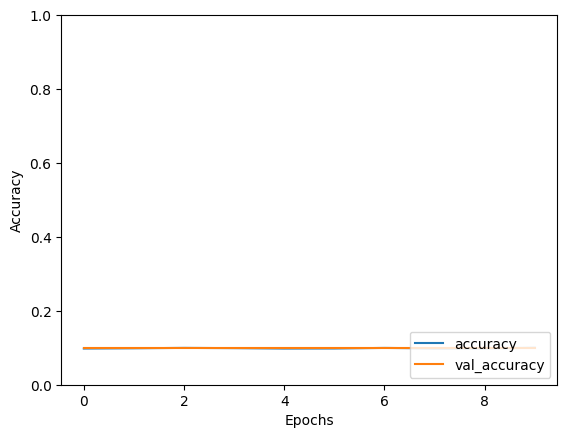

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
prediction=model.predict(x_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


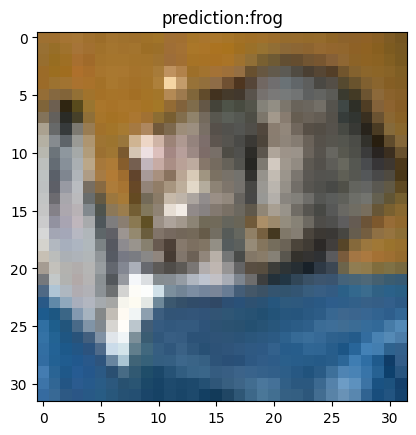

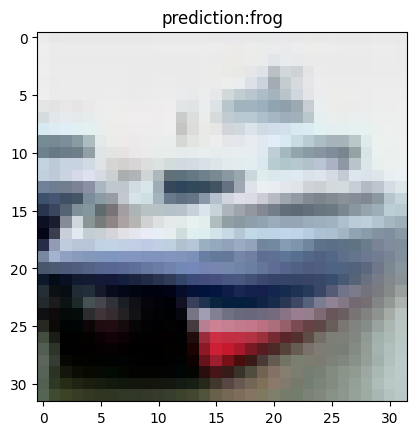

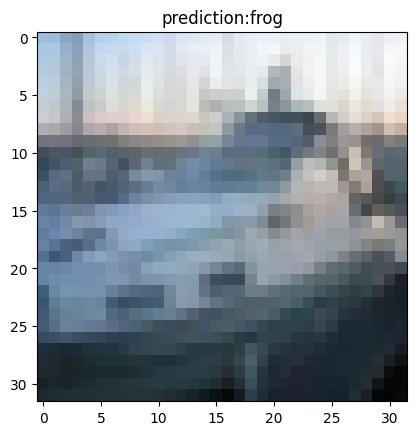

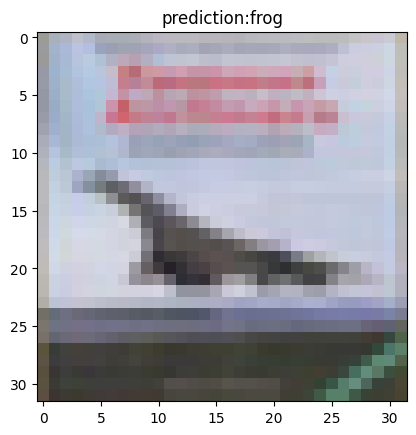

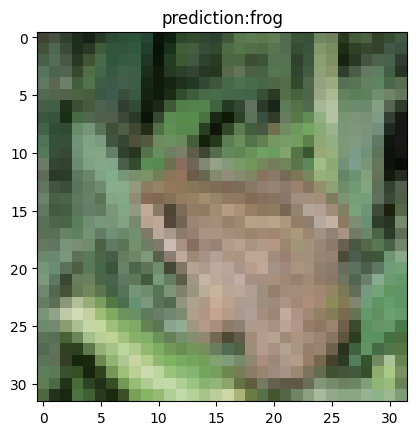

In [ ]:
for i in range(5):
  plt.figure()
  plt.imshow(x_test[i])
  plt.title(f'prediction:{ class_name[prediction[i].argmax()]}')